In [1]:
%matplotlib inline
import urllib.request
import re;
import chardet
import pandas as pd;
import numpy as np;

In [2]:
#transform url into string
def readURL(link):
    content =""
    with urllib.request.urlopen(link) as url:
        content = url.read()

    enconding = chardet.detect(content)['encoding'];
    content = content.decode(enconding);
    return content;

In [3]:
def extractTable(htmlContent):
    #remove sequence of more than one space
    htmlContent  = re.sub(r'\s{2,}','',htmlContent);
    htmlContent = htmlContent[ (htmlContent.find('<tbody')+7):]
    htmlContent = htmlContent[ : (htmlContent.find('/tbody>')-1)]
    #removing the class attribute
    htmlContent = re.sub(r'\s*class\=\"(\d+|\s+|\w+)+"\s*','',htmlContent);
    return htmlContent;

In [4]:
#transforming table into 
def fromTableToArray(htmlTable):
    def cleanCell(c):
        for i in range(len(c)):
            c[i] = c[i].replace('</td>','');
            c[i] = c[i].replace('.','');
            c[i] = c[i].replace(',','.');
        c = c[1:];
        return c;
        
    return [cleanCell(r.split('<td>')) for r in  re.split(r'\<\/tr\>',htmlTable)];    

In [5]:
listaUF = [
    ['am','norte'],
    ['ap','norte'],
    ['ac','norte'],
    ['rr','norte'],
    ['ro','norte'],
    ['to','norte'],
    ['PA','norte'],
    ['SP','sudeste'],
    ['MG','sudeste'],
    ['RJ','sudeste'],
    ['ES','sudeste'],
    ['PR','sul'],
    ['SC','sul'],
    ['RS','sul'],
    ['MS','centro-oeste'],
    ['MT','centro-oeste'],
    ['GO','centro-oeste'],
    ['DF','centro-oeste'],
    ['BA','nordeste'],
    ['AL','nordeste'],
    ['SE','nordeste'],
    ['PE','nordeste'],
    ['PB','nordeste'],
    ['RN','nordeste'],
    ['CE','nordeste'],
    ['MA','nordeste'],    
];

In [6]:
contents = [];
for state in listaUF:
    print ("Reading "+state[0]);
    contents.append({
        'state':state[0],
        'region':state[1],
        'content': readURL("https://cidades.ibge.gov.br/download/mapa_e_municipios.php?uf="+state[0])
    });

Reading am
Reading ap
Reading ac
Reading rr
Reading ro
Reading to
Reading PA
Reading SP
Reading MG
Reading RJ
Reading ES
Reading PR
Reading SC
Reading RS
Reading MS
Reading MT
Reading GO
Reading DF
Reading BA
Reading AL
Reading SE
Reading PE
Reading PB
Reading RN
Reading CE
Reading MA


In [83]:
for i in range(len(contents)):
    contents[i]['content']  = fromTableToArray(extractTable(contents[i]['content']));

In [84]:
data = pd.DataFrame();

for i in range(len(contents)):
    df = pd.DataFrame(contents[i]['content']);
    df['state'] =contents[i]['state'];
    df['region']=contents[i]['region'];
    data = pd.concat([data, df]);

In [85]:
data.head()

,0,1,2,3,4,5,6,state,region
0,Adamantina,3500105,adamantinense,33797,411.99,82.2,814490,am,norte
1,Adolfo,3500204,adolfino,3557,211.06,16.9,77638,am,norte
2,Aguaí,3500303,aguaiano,32148,474.55,67.7,682505,am,norte
3,Águas da Prata,3500402,pratense,7584,142.96,53.1,115273,am,norte
4,Águas de Lindóia,3500501,lindoiense,17266,60.13,287.2,342407,am,norte


In [87]:
data.columns = [
        'cidade',
        'codigoIBGE',
        'gentilico',
        'populacao',
        'area',
        'densidadeDemografica',
        'pib',
        'state',
        'region'];
data

,cidade,codigoIBGE,gentilico,populacao,area,densidadeDemografica,pib,state,region
0,Adamantina,3500105,adamantinense,33797,411.99,82.2,814490,am,norte
1,Adolfo,3500204,adolfino,3557,211.06,16.9,77638,am,norte
2,Aguaí,3500303,aguaiano,32148,474.55,67.7,682505,am,norte
3,Águas da Prata,3500402,pratense,7584,142.96,53.1,115273,am,norte
4,Águas de Lindóia,3500501,lindoiense,17266,60.13,287.2,342407,am,norte
5,Águas de Santa Bárbara,3500550,santa-barbarense,5601,404.46,13.8,119156,am,norte
6,Águas de São Pedro,3500600,água-pedrense,2707,3.61,488.9,108522,am,norte
7,Agudos,3500709,agudense,34524,966.71,35.7,1682487,am,norte
8,Alambari,3500758,alambariense,4884,159.60,30.7,64916,am,norte
9,Alfredo Marcondes,3500808,marcondense,3891,118.92,32.9,58904,am,norte


In [102]:
data.dropna(inplace=True);
data.to_csv('IBGE_Cities.csv',encoding='utf-8',sep='|',index=False);

In [103]:
data.populacao = data.populacao.astype(np.int32)
data.pib = data.pib.astype(np.float32)

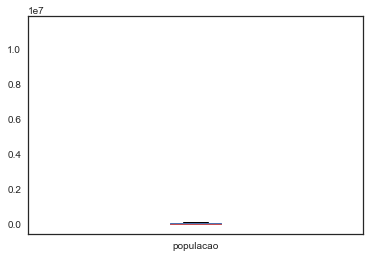

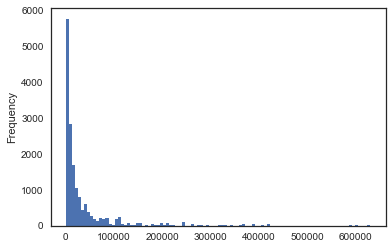

In [119]:
data.populacao.plot.box();
plt.show();
data.populacao[data.populacao <= data.populacao.quantile(0.99)].plot.hist(bins=100);

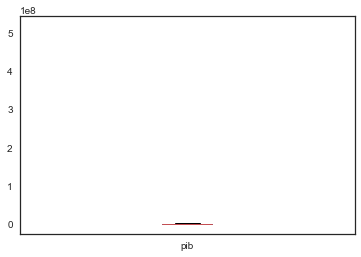

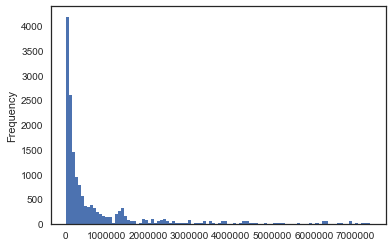

In [121]:
data.pib.plot.box();
plt.show();
data.pib[data.pib <= data.pib.quantile(0.95)].plot.hist(bins=100);

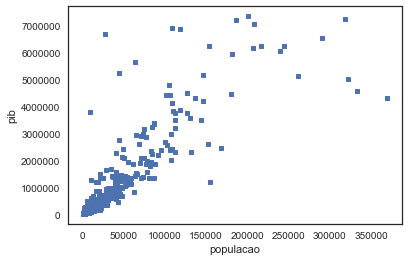

In [123]:
data[['populacao','pib']][data.pib <= data.pib.quantile(0.95)].plot.scatter(x='populacao',y='pib')

C:\Users\custjo01\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


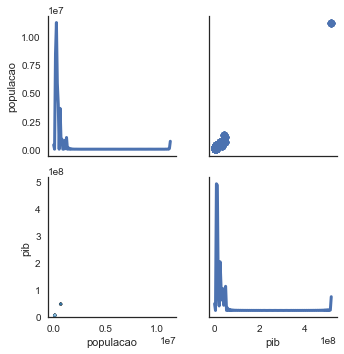

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

g = sns.PairGrid(data[['populacao','pib']], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)